In [48]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
file_path =  '/content/drive/MyDrive/owid-energy-data.csv'
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#Data Cleaning
df.isnull().sum()
df.fillna(0, inplace=True)
df.sort_values(by= 'year', inplace = True)

In [50]:
#Data Exploration
#Calculate the average energy efficiency for each year globally
average_energy_efficiency_by_year = df.groupby('year')['energy_per_capita'].mean().reset_index()
print(average_energy_efficiency_by_year)

     year  energy_per_capita
0    1900           0.000000
1    1901           0.000000
2    1902           0.000000
3    1903           0.000000
4    1904           0.000000
5    1905           0.000000
6    1906           0.000000
7    1907           0.000000
8    1908           0.000000
9    1909           0.000000
10   1910           0.000000
11   1911           0.000000
12   1912           0.000000
13   1913           0.000000
14   1914           0.000000
15   1915           0.000000
16   1916           0.000000
17   1917           0.000000
18   1918           0.000000
19   1919           0.000000
20   1920           0.000000
21   1921           0.000000
22   1922           0.000000
23   1923           0.000000
24   1924           0.000000
25   1925           0.000000
26   1926           0.000000
27   1927           0.000000
28   1928           0.000000
29   1929           0.000000
30   1930           0.000000
31   1931           0.000000
32   1932           0.000000
33   1933     

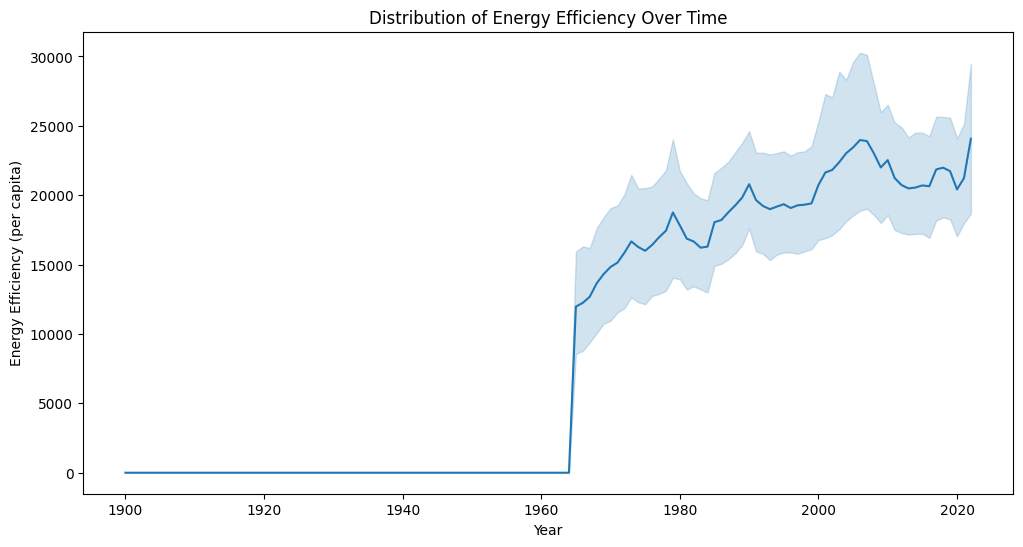

In [51]:
#Plot the distribution of energy efficiency values over time
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='energy_per_capita',data=df)
plt.title('Distribution of Energy Efficiency Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Efficiency (per capita)')
plt.show()

In [53]:
# Calculate the average energy efficiency for each country and year
average_energy_efficiency_by_country = df.groupby(['country', 'year'])['energy_per_capita'].mean().reset_index()

# Identify countries with noticeable improvements or declines
improvements = average_energy_efficiency_by_country.loc[average_energy_efficiency_by_country['energy_per_capita'].diff() > 0]
declines = average_energy_efficiency_by_country.loc[average_energy_efficiency_by_country['energy_per_capita'].diff() < 0]

print("Countries or Regions with Improvements:")
print(improvements)

print("\nCountries or Regions with Declines:")
print(declines)


Countries or Regions with Improvements:
           country  year  energy_per_capita
103    Afghanistan  1980            623.929
104    Afghanistan  1981            786.837
105    Afghanistan  1982            926.651
106    Afghanistan  1983           1149.196
109    Afghanistan  1986           1097.040
...            ...   ...                ...
21572     Zimbabwe  2005           4160.413
21577     Zimbabwe  2010           3592.672
21578     Zimbabwe  2011           3860.790
21579     Zimbabwe  2012           4106.950
21585     Zimbabwe  2018           3441.986

[6127 rows x 3 columns]

Countries or Regions with Declines:
           country  year  energy_per_capita
107    Afghanistan  1984           1121.573
108    Afghanistan  1985           1067.071
112    Afghanistan  1989           3003.004
113    Afghanistan  1990           2968.316
114    Afghanistan  1991           1293.862
...            ...   ...                ...
21584     Zimbabwe  2017           3068.011
21586     Zimbabwe

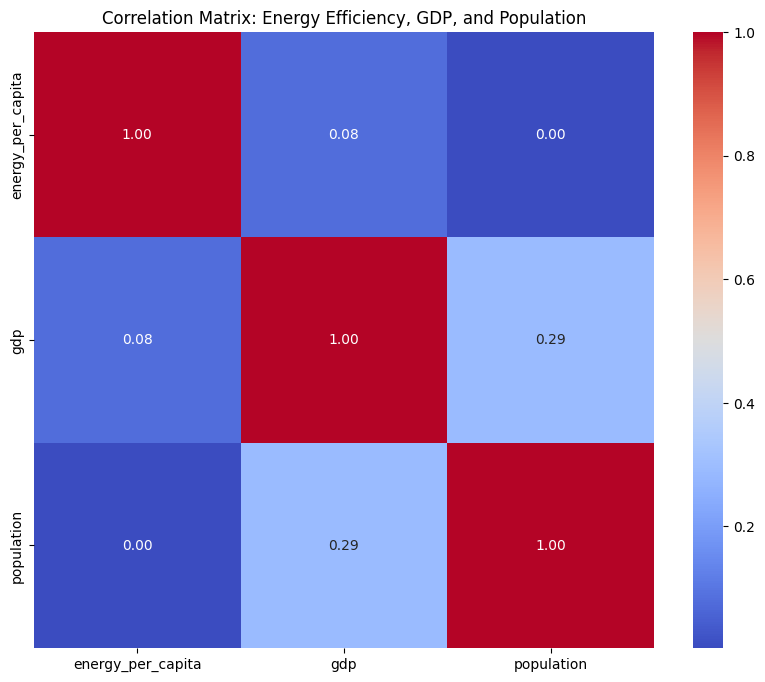

In [54]:
#Calculate correlation matrix for energy per capita, gdp and population
correlation_matrix = df[['energy_per_capita', 'gdp', 'population']].corr()

# heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Energy Efficiency, GDP, and Population')
plt.show()


In [ ]:
df['gdp']


15546    0.0
9712     0.0
18082    0.0
14960    0.0
13497    0.0
        ... 
9588     0.0
6748     0.0
13619    0.0
14502    0.0
21589    0.0
Name: gdp, Length: 21590, dtype: float64

In [ ]:
gdp_range = (df['gdp'].min(), df['gdp'].max())
print(gdp_range)

(0.0, 113630171365376.0)


In [55]:
# Categorise GDP
custom_bins = [0, 1e9, 1e11, 1e13, float('inf')]

# Labels for income groups
income_labels = ['Low-Income', 'Lower-Middle-Income', 'Upper-Middle-Income', 'High-Income']

# Create a new column 'income_group'
df['income_group'] = pd.cut(df['gdp'], bins=custom_bins, labels=income_labels, right=False)

#Calculate average energy efficiency
average_energy_by_income = df.groupby('income_group')['energy_per_capita'].mean()
print(average_energy_by_income)


income_group
Low-Income              8534.177487
Lower-Middle-Income    10800.563994
Upper-Middle-Income    27389.370251
High-Income            56604.409587
Name: energy_per_capita, dtype: float64


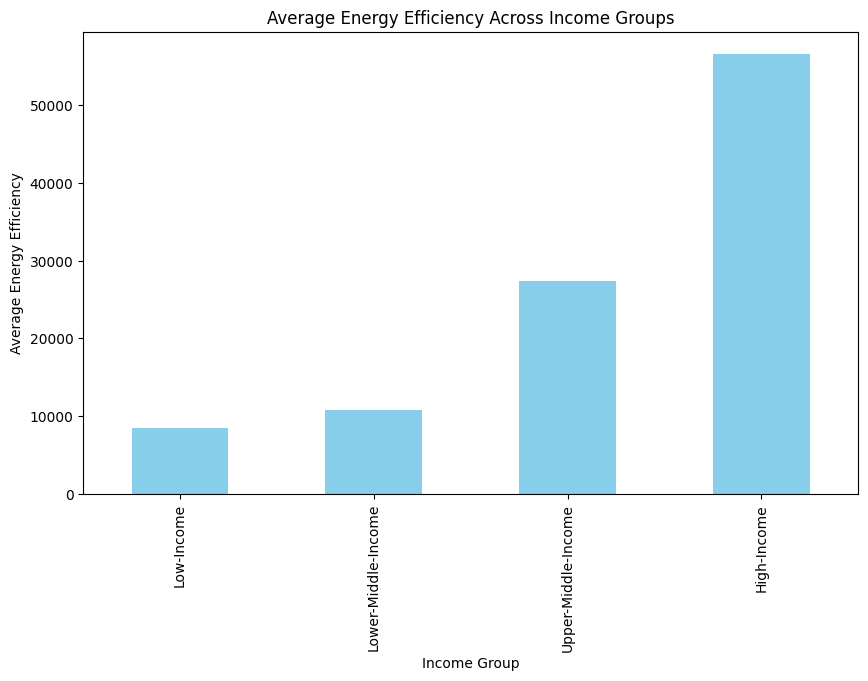

In [56]:

# Plotting the average energy efficiency by income group
plt.figure(figsize=(10, 6))
average_energy_by_income.plot(kind='bar', color='skyblue')
plt.title('Average Energy Efficiency Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Average Energy Efficiency')
plt.show()


In [57]:
# correlation analysis between energy efficienc, gdp,renewable consumption and carbon intensity
selected_columns = ['energy_per_capita', 'gdp', 'renewables_consumption', 'carbon_intensity_elec']
correlation_matrix = df[selected_columns].corr()

print(correlation_matrix)


                        energy_per_capita       gdp  renewables_consumption  \
energy_per_capita                1.000000  0.080750                0.065887   
gdp                              0.080750  1.000000                0.295147   
renewables_consumption           0.065887  0.295147                1.000000   
carbon_intensity_elec            0.251792  0.071396                0.052214   

                        carbon_intensity_elec  
energy_per_capita                    0.251792  
gdp                                  0.071396  
renewables_consumption               0.052214  
carbon_intensity_elec                1.000000  


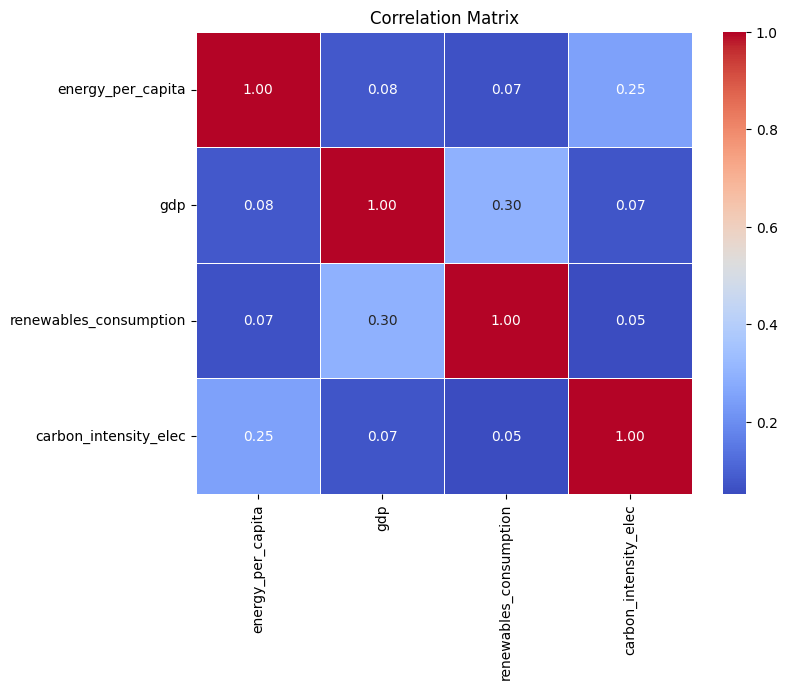

In [58]:
#Visualise Correlation Matrix
# Calculate the correlation matrix
correlation_matrix = df[['energy_per_capita', 'gdp', 'renewables_consumption', 'carbon_intensity_elec']].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
plt.title('Correlation Matrix')
plt.show()


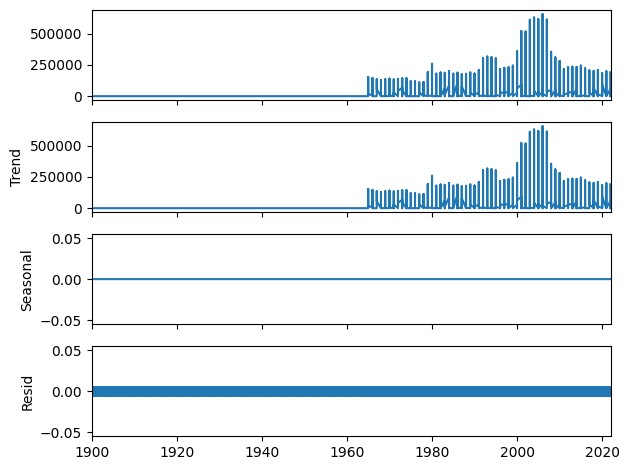

In [59]:

# Attempt a time series anlysis
time_series_data = df[['year', 'energy_per_capita']].set_index('year')

# Decompose the time series
result = seasonal_decompose(time_series_data, model='additive', period=1)  # You might need to adjust the period

# Plot the decomposition
result.plot()
plt.show()
